In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

import plotly.graph_objects as go

In [2]:
# importing dataset

dataset = pd.read_csv('feeds_SACP1_old_2021-09-09.csv')
dataset_final = dataset[['Ambient Temp (degC)','Humidity (%)', 'Soil Moisture (%)', 'Capacitor Voltage (mV)', 'Soil Temperature (degC)', 'SACP Cell Current (mA)', 'Soil Voltage (V)', 'Cell Power (mW)']]

# seperating dataset based on time day month and year
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset['year'] = dataset['created_at'].dt.year
dataset['month'] = dataset['created_at'].dt.month
dataset['day'] = dataset['created_at'].dt.day

dataset = dataset.drop(dataset[dataset['SACP Cell Current (mA)'] > 100].index)
dataset = dataset.drop(dataset[dataset['Soil Voltage (V)'] > 3].index)
dataset = dataset.drop(dataset[dataset['Cell Power (mW)'] > 100].index)
dataset['labels'] = 0
dataset

C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\DEEP\anaconda3\envs\tf_gpu\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day,labels
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.2946,8,2020,6,18,0
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,0
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,0
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.2946,8,2020,6,18,0
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.2946,8,2020,6,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380356,2021-07-26 19:11:20,380357,26.1250,88.10663,100,2925.48389,24.9375,16.4,1.6400,0,2021,7,26,0
380357,2021-07-26 19:12:30,380358,26.0625,88.35374,100,2874.19360,24.9375,16.4,1.6400,0,2021,7,26,0
380358,2021-07-26 19:13:40,380359,26.0625,88.63950,100,2889.67749,24.9375,16.4,1.6400,0,2021,7,26,0
380359,2021-07-26 19:14:49,380360,25.9375,88.89094,100,3067.41943,24.8750,16.3,1.6300,0,2021,7,26,0


In [5]:
data_test = dataset.loc[(dataset['month'] == 4) & (dataset['year'] == 2021) & ((dataset['day'] == 28) | (dataset['day'] == 29))]

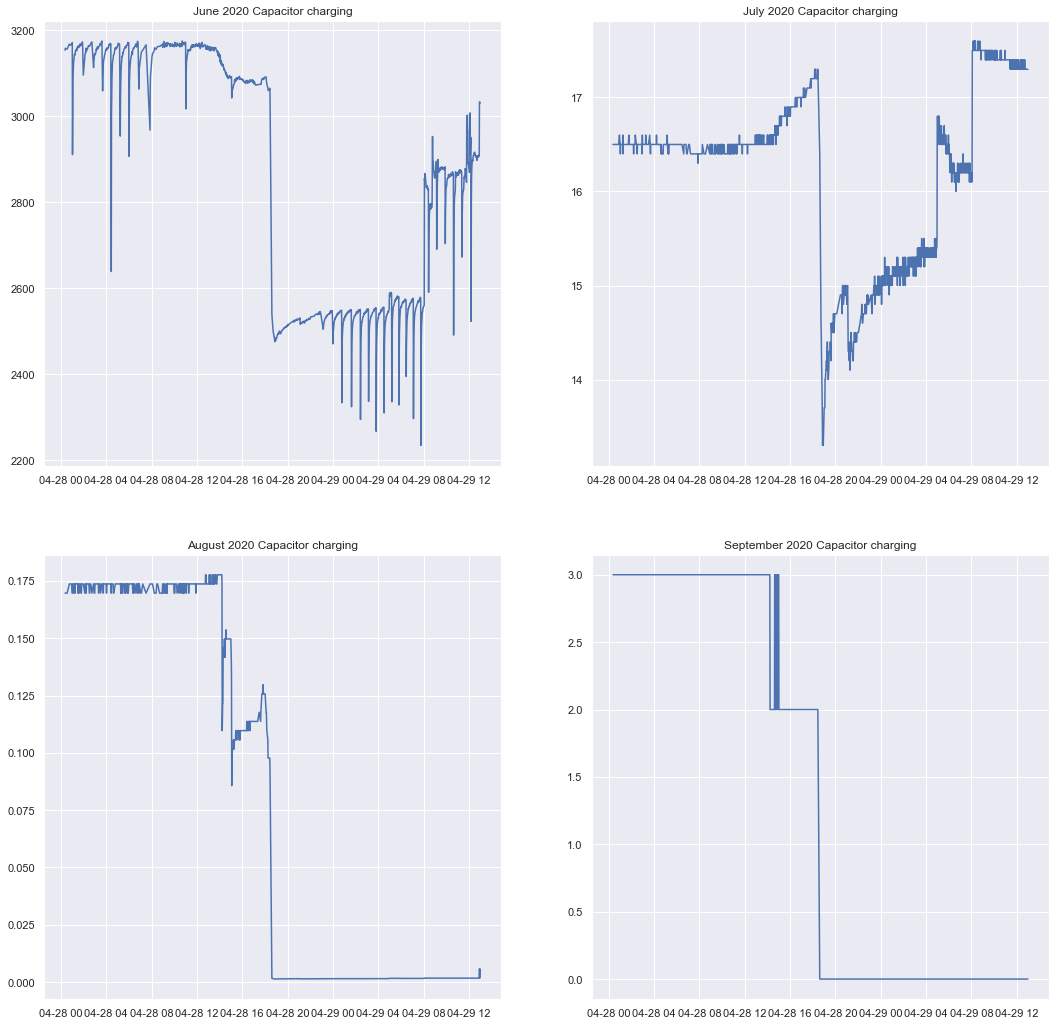

In [6]:
fig = plt.figure(figsize=(18,18))

plt.subplot(221)
plt.title("June 2020 Capacitor charging")
plt.plot(data_test['created_at'], data_test['Capacitor Voltage (mV)'])

plt.subplot(222)
plt.title("July 2020 Capacitor charging")
plt.plot(data_test['created_at'], data_test['SACP Cell Current (mA)'])

plt.subplot(223)
plt.title("August 2020 Capacitor charging")
plt.plot(data_test['created_at'], data_test['Soil Voltage (V)'])

plt.subplot(224)
plt.title("September 2020 Capacitor charging")
plt.plot(data_test['created_at'], data_test['Cell Power (mW)'])

In [ ]:
index = dataset.index
condition = (dataset['month'] == 7)

In [ ]:
indices = index[condition]

In [ ]:
indices

In [ ]:
dataset.loc[380225, :]

In [ ]:
dataset.loc[369925:380225, 'labels'] = 1

In [ ]:
dataset

In [ ]:
dataset.describe()